In [1]:
import tensorflow as tf
import keras

Using TensorFlow backend.


Установка начальных параметров

In [2]:
image_size = (32,32)
batch_size = 32
train_flow_path= './images/training_set'
test_flow_path = './images/test_set'


Получение данных при помощи ImageDataGenerator

In [3]:
data_gen_train = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True
)
data_gen_test = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
)
train_flow = data_gen_train.flow_from_directory(
    train_flow_path,
    target_size=image_size,
    batch_size=batch_size,
    color_mode='rgb',
    classes=['Э','Ю','Я'],
    class_mode='categorical',
    shuffle=True,
    seed=42
)
test_flow = data_gen_test.flow_from_directory(
    test_flow_path,
#     train_flow_path,
    target_size = image_size,
    batch_size = batch_size,
    color_mode='rgb',
    classes=['Э','Ю','Я'],
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 708 images belonging to 3 classes.
Found 282 images belonging to 3 classes.


Построение сети

In [4]:
from keras.models import Sequential
from keras.layers import Flatten,InputLayer,Dense, Dropout, Convolution2D, MaxPool2D, Dropout, BatchNormalization

In [5]:
def add_conv_layer(model,size,name='Layer Conv'):
    model.add(
        Convolution2D(
            size,
            (3,3),
            activation='relu',
            padding='same',
        )
    )
    model.add(
        Convolution2D(
            size,
            (3,3),
            activation='relu',
            padding='same'
        )
    )
    model.add(
        Convolution2D(
            size,
            (3,3),
            activation='relu',
            padding='same'
        )
    )
    model.add(MaxPool2D())
    return model

In [6]:
model = Sequential(name='ConvolutionNetworkChars')
model.add(Convolution2D(16,(3,3),activation='relu',padding="same",input_shape=[32,32,3]))
model.add(Convolution2D(16,(3,3),activation='relu',padding="same"))
model.add(MaxPool2D())
add_conv_layer(model,32)
add_conv_layer(model,64)
add_conv_layer(model,128)
add_conv_layer(model,256)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
# model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))



model.add(Dense(3,activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "ConvolutionNetworkChars"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 

Обучение

In [7]:
history = model.fit_generator(train_flow,epochs=50,validation_data=test_flow)

/home/hvidsmen/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/hvidsmen/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
23/23 [==============================] - 25s 1s/step - loss: 1.1203 - accuracy: 0.3460 - val_loss: 1.0982 - val_accuracy: 0.3333
Epoch 2/50
23/23 [==============================] - 15s 671ms/step - loss: 1.1106 - accuracy: 0.3658 - val_loss: 1.0698 - val_accuracy: 0.3333
Epoch 3/50
23/23 [==============================] - 16s 684ms/step - loss: 1.0964 - accuracy: 0.3701 - val_loss: 1.1023 - val_accuracy: 0.3333
Epoch 4/50
23/23 [==============================] - 16s 713ms/step - loss: 1.0973 - accuracy: 0.3729 - val_loss: 1.1008 - val_accuracy: 0.3333
Epoch 5/50
23/23 [==============================] - 16s 711ms/step - loss: 1.0967 - accuracy: 0.3644 - val_loss: 1.0898 - val_accuracy: 0.3333
Epoch 6/50
23/23 [==============================] - 16s 697ms/step - loss: 1.0962 - accuracy: 0.3644 - val_loss: 1.1191 - val_accuracy: 0.3333
Epoch 7/50
23/23 [==============================] - 16s 692ms/step - loss: 1.0984 - accuracy: 0.3644 - val_loss: 1.0951 - val_accuracy: 0.3333
Ep

In [14]:
scores = model.evaluate_generator(test_flow)
print(f'* Loss = {scores[0]}\n* Accuracy = {scores[1]}')

* Loss = 0.5459054112434387
* Accuracy = 0.9645389914512634


Визуализация результатов

In [9]:
from keras.utils import plot_model

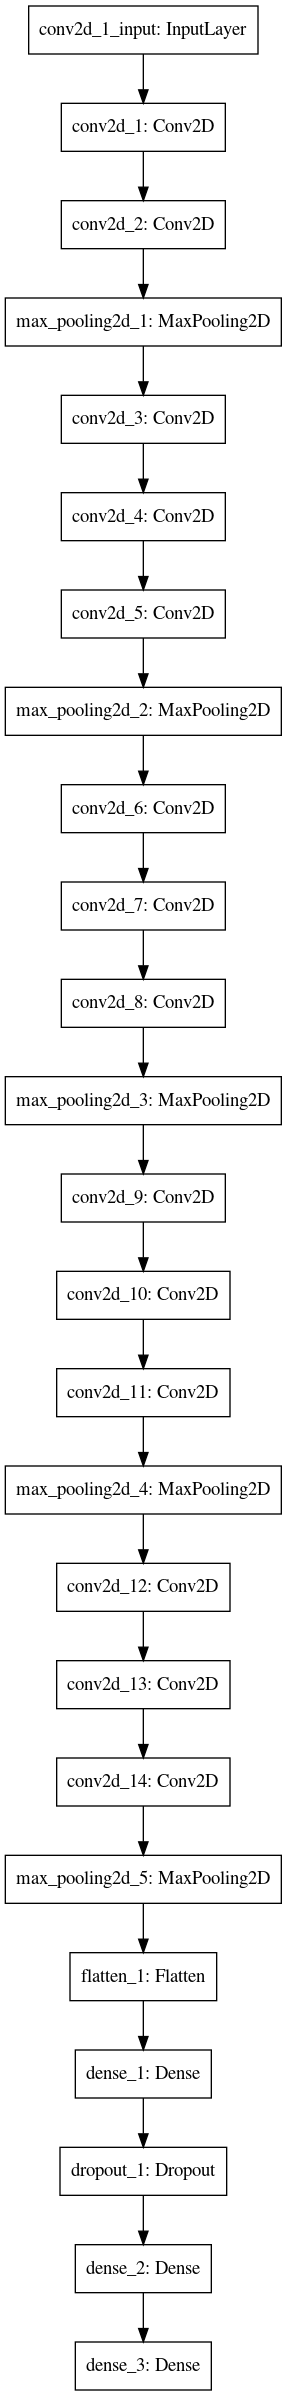

In [10]:
plot_model(model,'./images/report/ConvolutionNetworkStructure.png')

In [11]:
import matplotlib.pyplot as plt

def plot_history(history, scores,figsize=(12,6), path_saving='./images/report/', name='ConvolutionNetworkScores.png'):
    n = len(scores)
    fig,axs = plt.subplots(nrows=1,ncols=n,figsize=figsize)
    for i,score in enumerate(scores):
        axs[i].plot(history.history[score])
        axs[i].plot(history.history[f'val_{score}'])
        axs[i].set_title(f'Model {score}')
        axs[i].set_ylabel(f'{score}')
        axs[i].set_xlabel(f'epoch')
        axs[i].legend(['Train', 'Test'], loc='upper left')
    
    fig.savefig(path_saving+name)

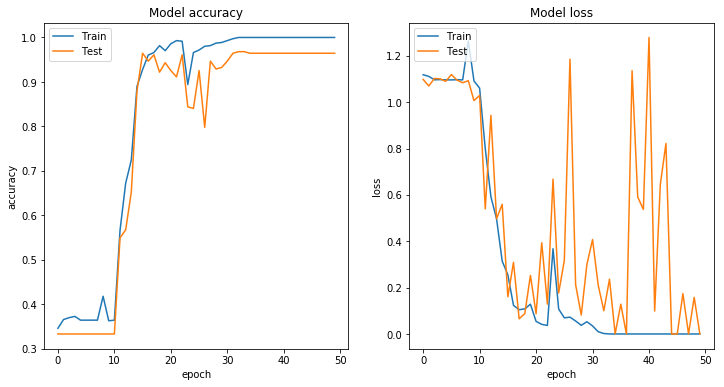

In [12]:
plot_history(history,['accuracy','loss'])